In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
incomedata = pd.read_csv('income_data.csv')

In [3]:
incomedata.head()

,Project Name,Neighborhood,Zip Code,TtlProjUnits,RentUnits,OwnUnits,TtlMarket,MarketRent,MarketOwn,Total Income-Restricted,Income-Restricted Rental,Income-Restricted Ownership,Tenure,Public/ Private,Includes Senior Units?,Section 8
0,Abbot Street/ Shawmut Ave,Roxbury,2119.0,16,16,0,0.0,0.0,0.0,16,16,0.0,Rental,Private,NaN,NaN
1,Academy Homes I,Roxbury,2119.0,202,202,0,52.0,52.0,0.0,150,150,0.0,Rental,Private,NaN,NaN
2,Academy Homes II,Roxbury,2119.0,236,236,0,0.0,0.0,0.0,236,236,0.0,Rental,Private,NaN,Y
3,Adams Court Phase A,Mattapan,2126.0,50,50,0,0.0,0.0,0.0,50,50,0.0,Rental,Private,NaN,NaN
4,Adams Court Phase B,Mattapan,2126.0,45,45,0,0.0,0.0,0.0,45,45,0.0,Rental,Private,NaN,NaN


In [4]:
incomedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Project Name                 1445 non-null   object 
 1   Neighborhood                 1445 non-null   object 
 2   Zip Code                     1442 non-null   float64
 3   TtlProjUnits                 1445 non-null   int64  
 4   RentUnits                    1445 non-null   int64  
 5   OwnUnits                     1445 non-null   int64  
 6   TtlMarket                    1444 non-null   float64
 7   MarketRent                   1444 non-null   float64
 8   MarketOwn                    1444 non-null   float64
 9   Total Income-Restricted      1445 non-null   int64  
 10  Income-Restricted Rental     1445 non-null   int64  
 11  Income-Restricted Ownership  1444 non-null   float64
 12  Tenure                       1445 non-null   object 
 13  Public/ Private   

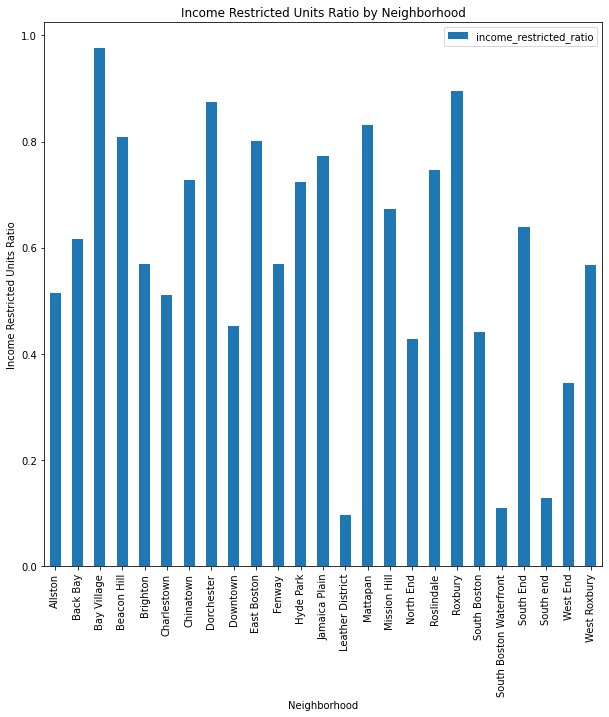

In [12]:
incomedata['income_restricted_ratio'] = incomedata['Total Income-Restricted'] / incomedata['TtlProjUnits']

neighborhood_grouping = incomedata.groupby('Neighborhood').mean()

# Create a bar chart of the results
neighborhood_grouping.plot(kind='bar', y='income_restricted_ratio', figsize=(10,10))
plt.title('Income Restricted Units Ratio by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Income Restricted Units Ratio')
plt.show()

In [30]:
income_per_nh = pd.read_csv('income_per_neighborhood.csv')
income_per_nh = income_per_nh.iloc[:, :-2]
income_per_nh = income_per_nh.drop(index=[0, 1, 2, 3, 4])
income_per_nh = income_per_nh.rename(columns={'Per Capita Income': 'Neighborhood', 'Unnamed: 1': 'Population', 'Unnamed: 2': 'Aggregate Income',
                                              'Unnamed: 3': 'Per Capita Income'})

income_per_nh = income_per_nh.dropna(subset=['Per Capita Income'])

income_per_nh['Per Capita Income'] = income_per_nh['Per Capita Income'].str.replace('$', '').str.replace(',', '').astype(int)
print(income_per_nh.columns)

Index(['Neighborhood', 'Population', 'Aggregate Income', 'Per Capita Income'], dtype='object')


<ipython-input-30-2353ef192e5b>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  income_per_nh['Per Capita Income'] = income_per_nh['Per Capita Income'].str.replace('$', '').str.replace(',', '').astype(int)


In [31]:
income_per_nh.head()

,Neighborhood,Population,Aggregate Income,Per Capita Income
5,Allston,"19,261","$657,738,300",34149
6,Back Bay,"17,783","$1,968,165,900",110677
7,Beacon Hill,"9,648","$964,851,000",100005
8,Brighton,"55,297","$2,281,630,300",41261
9,Charlestown,"19,890","$1,498,490,600",75339


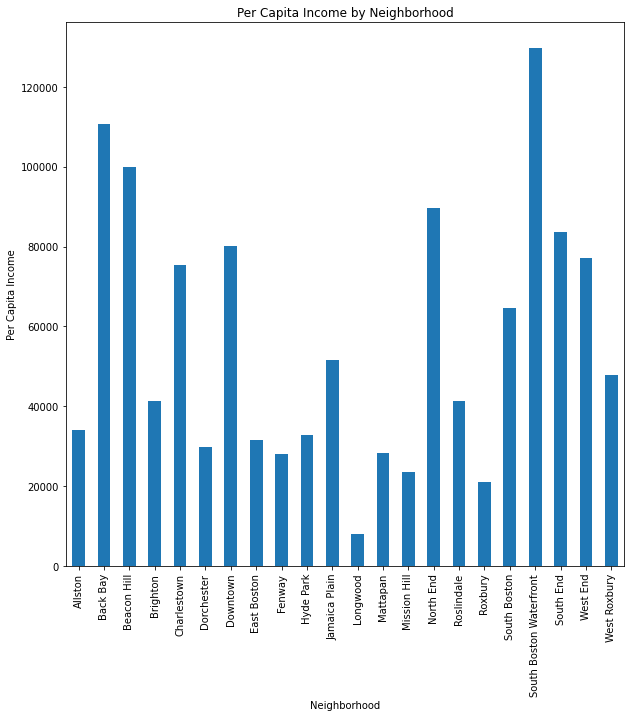

In [33]:
grouped = income_per_nh.groupby('Neighborhood')['Per Capita Income'].mean()

# Create a bar chart of the results
grouped.plot(kind='bar', figsize=(10, 10))
plt.title('Per Capita Income by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Per Capita Income')
plt.show()

In [41]:
rent_prices = pd.read_csv('rent_prices.csv', header=1)
rent_prices.head()

,ZIP Code,Neighborhood,SRO*,Efficiency,One-Bedroom,Two-Bedroom,Three-Bedroom,Four-Bedroom
0,02108,Beacon Hill,"$2,280","$3,040","$3,300","$3,950","$4,810","$5,310"
1,02109,Downtown,"$2,280","$3,040","$3,300","$3,950","$4,810","$5,310"
2,02110,Downtown,"$2,280","$3,040","$3,300","$3,950","$4,810","$5,310"
3,02111,Chinatown,"$2,055","$2,740","$2,980","$3,570","$4,340","$4,800"
4,02113,North End,"$1,905","$2,540","$2,760","$3,310","$4,030","$4,450"


In [ ]:
# to be completed